Hesam Hosseini
4000101034

## Questions
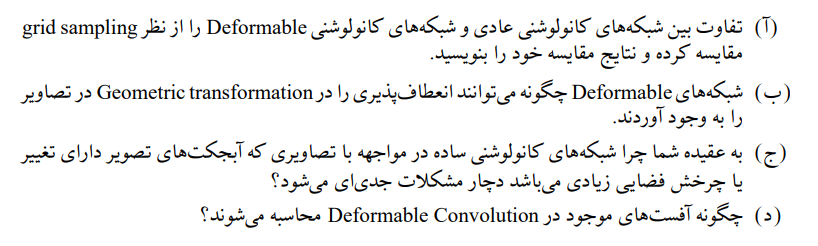

### Q1 Normal Convolution vs. Deformable Convolution:

   - Normal Convolution:
       - Requires a fixed grid for feature sampling, which may not effectively capture deformable structures.
       - Limited in capturing spatial details as it assumes a stationary receptive field.
       - Perform well in capturing translation-invariant patterns.
   - Deformable Convolution:
       - Adapts the sampling grid to the underlying features, enabling better modeling of deformable structures and distortions.
       - Allows for capturing fine-grained spatial details and handling geometric transformations more effectively.
       - Requires additional parameters to learn the offsets, leading to increased computational complexity.

we can say that normal convolutions are efficient for capturing translation-invariant patterns, and deformable convolutions are good in modeling deformable structures and spatial variations within the data, making them particularly useful in tasks where precise localization and fine feature extraction are essential.

### Q2

one problem with reqular CNN is that the receptive field sizes of all activation units in the same CNN layer are the same
and in deformable cnvolution
 by allowing the network to learn spatial transformations directly from the data we can fix this problem

 more explanaion:
 These networks achieve this by introducing additional learnable parameters that control the spatial sampling locations of the convolutional operation. This enables the network to adaptively adjust its receptive fields according to the input, allowing for more flexible and adaptive modeling of geometric transformations such as rotation, scaling, and deformation. Essentially, the network can learn to spatially transform its feature representations to better align with the characteristics of the input image

### Q3
as mentioned last part the receptive field sizes of all activation units in the same CNN layer are the same


#### Q4

- Define the Offset Generation Network (OGN):
   An OGN is typically used to predict the offsets for each spatial location in the input feature map. It takes the input feature map as input and outputs the predicted offsets.

- Offset Calculation:
   For each spatial location (x, y) in the input feature map, the OGN produces two offset values (δx, δy) that determine the sampling location for the deformable convolution operation.

- Sampling from Input Feature Map:
    Use the predicted offsets (δx, δy) to sample the input feature map at the corresponding spatial location (x + δx, y + δy), where the offset values are typically interpolated bilinearly.

- Deformable Convolution Operation:
    Perform the convolution operation using the sampled values to produce the output feature map.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader,Subset,Dataset

In [2]:
!git clone https://github.com/pdollar/coco/
%cd coco/PythonAPI
!make
!python setup.py install
%cd ../..
!rm -r coco

Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 2.79 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/coco/PythonAPI
python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wforma

In [3]:
!pwd

/content


In [4]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2023-12-23 15:18:28--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.226.161, 52.216.220.201, 52.217.132.89, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.226.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  46.8MB/s    in 6m 40s  

2023-12-23 15:25:08 (46.1 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2023-12-23 15:25:08--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.195, 3.5.27.169, 52.216.108.67, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80

In [5]:
!pwd

/content


In [6]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/00000037

In [7]:
!rm *.zip

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
class CocoDataset(Dataset):
    def __init__(self, root_dir, jason_dir, datset_size, num_objects,transform=None):
        coco_set = CocoDetection(root=root_dir, annFile= jason_dir, transform=transform)
        coco_set = torch.utils.data.Subset(coco_set, [i for i in range(datset_size)])
        self.dataset = coco_set
        self.num_objects = num_objects

    def __getitem__(self, index):
        """
        outs:
        data , multi_hot_label containg what object where present in the picture
        """
        data, target = self.dataset[index]
        objects = [target[i]['category_id']-1 for i in range(len(target))]
        multi_hot_vector = torch.zeros(self.num_objects)
        multi_hot_vector[objects] = 1
        return data , multi_hot_vector

    def __len__(self):
        return len(self.dataset)

In [10]:
train_dir = "./train2017"
train_json_dir ="./annotations/instances_train2017.json"
val_dir = "./val2017"
val_json_dir ="./annotations/instances_val2017.json"


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create a COCO dataset instance
trainset =  CocoDataset(train_dir,train_json_dir,2**12,90,transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
valset = CocoDataset(train_dir,train_json_dir,2**10,90,transform=transform)
valloader = DataLoader(valset, batch_size=32, shuffle=True)
print('Number of train samples: ', len(trainset))
print('Number of validation samples: ', len(valset))



loading annotations into memory...
Done (t=21.50s)
creating index...
index created!
loading annotations into memory...
Done (t=20.10s)
creating index...
index created!
Number of train samples:  4096
Number of validation samples:  1024


In [11]:
def plot_tensor(img,label=None):
  if len(img.shape)>3:
      fig,axes = plt.subplots(nrows=1, ncols=img.shape[0],figsize=(20, 20))
      for i,ax in enumerate(axes):
        sel_img = img[i].numpy().transpose(1, 2, 0)
        ax.imshow(sel_img)
        ax.axis("off")
        if label is not None:
          ax.set_title(label[i])
  else:
    img = img.numpy().transpose(1, 2, 0)
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(6, 8))
    ax.imshow(img)
    ax.axis("off")

# ax = fig.add_subplot(111, projection='3d')


tensor([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

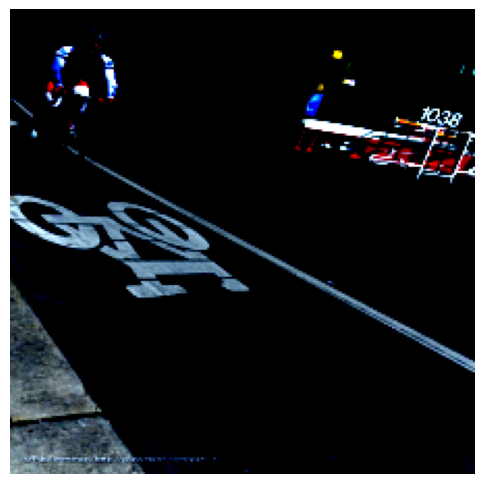

In [12]:
img, target= next(iter(trainloader))
plot_tensor(img[0])
target[0]

defrmable convoultion from scrach:

In [17]:
import numpy as np
import torch
import torch.nn as nn


class DeformableConv2d(nn.Module):
    def __init__(self, inc, outc, kernel_size=3, padding=1, stride=1, bias=None, lr_ratio=1.0):
        super(DeformableConv2d, self).__init__()
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride
        self.zero_padding = nn.ZeroPad2d(padding)
        self.offset_conv = nn.Conv2d(inc, 2 * kernel_size * kernel_size, kernel_size=3, padding=1, stride=stride)
        nn.init.constant_(self.offset_conv.weight, 0)
        self.offset_conv.register_backward_hook(self._set_lr)
        self.conv = nn.Conv2d(inc, outc, kernel_size=kernel_size, stride=kernel_size, bias=bias)
        self.lr_ratio = lr_ratio

    def _set_lr(self, module, grad_input, grad_output):
        new_grad_input = []
        for i in range(len(grad_input)):
            if grad_input[i] is not None:
                new_grad_input.append(grad_input[i] * self.lr_ratio)
            else:
                new_grad_input.append(grad_input[i])
        new_grad_input = tuple(new_grad_input)
        return new_grad_input

    def forward(self, x):
        offset = self.offset_conv(x)
        dtype = offset.data.type()
        ks = self.kernel_size
        N = offset.size(1) // 2
        offsets_index = torch.cat([torch.arange(0, 2 * N, 2), torch.arange(1, 2 * N + 1, 2)]).type_as(x).long()
        offsets_index.requires_grad = False
        offsets_index = offsets_index.unsqueeze(dim=0).unsqueeze(dim=-1).unsqueeze(dim=-1).expand(*offset.size())
        offset = torch.gather(offset, dim=1, index=offsets_index)
        if self.padding:
            x = self.zero_padding(x)
        p = self._get_p(offset, dtype)
        p = p.contiguous().permute(0, 2, 3, 1)
        q_lt = p.detach().floor()
        q_rb = q_lt + 1
        q_lt = torch.cat([torch.clamp(q_lt[..., :N], 0, x.size(2) - 1), torch.clamp(q_lt[..., N:], 0, x.size(3) - 1)],
                         dim=-1).long()
        q_rb = torch.cat([torch.clamp(q_rb[..., :N], 0, x.size(2) - 1), torch.clamp(q_rb[..., N:], 0, x.size(3) - 1)],
                         dim=-1).long()
        q_lb = torch.cat([q_lt[..., :N], q_rb[..., N:]], -1)

        q_rt = torch.cat([q_rb[..., :N], q_lt[..., N:]], -1)
        mask = torch.cat([p[..., :N].lt(self.padding) + p[..., :N].gt(x.size(2) - 1 - self.padding),
                          p[..., N:].lt(self.padding) + p[..., N:].gt(x.size(3) - 1 - self.padding)], dim=-1).type_as(p)
        mask = mask.detach()
        floor_p = torch.floor(p)
        p = p * (1 - mask) + floor_p * mask
        p = torch.cat([torch.clamp(p[..., :N], 0, x.size(2) - 1), torch.clamp(p[..., N:], 0, x.size(3) - 1)], dim=-1)

          #  In the paper, G(q, p) = g(q_x, p_x) * g(q_y, p_y)
           # g(a, b) = max(0, 1-|a-b|)

        # bilinear kernel (b, h, w, N)
        g_lt = (1 + (q_lt[..., :N].type_as(p) - p[..., :N])) * (1 + (q_lt[..., N:].type_as(p) - p[..., N:]))
        g_rb = (1 - (q_rb[..., :N].type_as(p) - p[..., :N])) * (1 - (q_rb[..., N:].type_as(p) - p[..., N:]))
        g_lb = (1 + (q_lb[..., :N].type_as(p) - p[..., :N])) * (1 - (q_lb[..., N:].type_as(p) - p[..., N:]))
        g_rt = (1 - (q_rt[..., :N].type_as(p) - p[..., :N])) * (1 + (q_rt[..., N:].type_as(p) - p[..., N:]))

        x_q_lt = self._get_x_q(x, q_lt, N)
        x_q_rb = self._get_x_q(x, q_rb, N)
        x_q_lb = self._get_x_q(x, q_lb, N)
        x_q_rt = self._get_x_q(x, q_rt, N)


            #In the paper, x(p) = ΣG(p, q) * x(q), G is bilinear kernal


        x_offset = g_lt.unsqueeze(dim=1) * x_q_lt + \
                   g_rb.unsqueeze(dim=1) * x_q_rb + \
                   g_lb.unsqueeze(dim=1) * x_q_lb + \
                   g_rt.unsqueeze(dim=1) * x_q_rt



        x_offset = self._reshape_x_offset(x_offset, ks)

        out = self.conv(x_offset)
        return out

    def _get_p_n(self, N, dtype):
        p_n_x, p_n_y = torch.meshgrid(
            [torch.arange(-(self.kernel_size - 1) // 2, (self.kernel_size - 1) // 2 + 1),
             torch.arange(-(self.kernel_size - 1) // 2, (self.kernel_size - 1) // 2 + 1)])
        p_n = torch.cat([torch.flatten(p_n_x), torch.flatten(p_n_y)], 0)
        p_n = p_n.view(1, 2 * N, 1, 1).type(dtype)
        p_n.requires_grad = False
        return p_n

    def _get_p_0(self, h, w, N, dtype):
        p_0_x, p_0_y = torch.meshgrid([
            torch.arange(1, h * self.stride + 1, self.stride),
            torch.arange(1, w * self.stride + 1, self.stride)])
        p_0_x = torch.flatten(p_0_x).view(1, 1, h, w).repeat(1, N, 1, 1)
        p_0_y = torch.flatten(p_0_y).view(1, 1, h, w).repeat(1, N, 1, 1)
        p_0 = torch.cat([p_0_x, p_0_y], 1).type(dtype)
        p_0.requires_grad = False

        return p_0

    def _get_p(self, offset, dtype):
        N, h, w = offset.size(1) // 2, offset.size(2), offset.size(3)
        p_n = self._get_p_n(N, dtype)
        p_0 = self._get_p_0(h, w, N, dtype)
        p = p_0 + p_n + offset
        return p

    def _get_x_q(self, x, q, N):
        b, h, w, _ = q.size()
        padded_w = x.size(3)
        c = x.size(1)

        x = x.contiguous().view(b, c, -1)
        index = q[..., :N] * padded_w + q[..., N:]  # offset_x*w + offset_y
        index = index.contiguous().unsqueeze(dim=1).expand(-1, c, -1, -1, -1).contiguous().view(b, c, -1)

        x_offset = x.gather(dim=-1, index=index).contiguous().view(b, c, h, w, N)

        return x_offset

    @staticmethod
    def _reshape_x_offset(x_offset, ks):
        b, c, h, w, N = x_offset.size()
        x_offset = torch.cat([x_offset[..., s:s + ks].contiguous().view(b, c, h, w * ks) for s in range(0, N, ks)],
                             dim=-1)
        x_offset = x_offset.contiguous().view(b, c, h * ks, w * ks)

        return x_offset


deformable convlution in with torchvision.ops.deform_conv2d

In [ ]:
import torch
import torchvision.ops
from torch import nn

class DeformableConv2d(nn.Module):
    def __init__(self,in_channels,out_channels,kernel_size=3,stride=1, padding=1,bias=False):

        super(DeformableConv2d, self).__init__()

        self.padding = padding

        self.offset_conv = nn.Conv2d(in_channels, 2 * kernel_size * kernel_size, kernel_size=kernel_size, stride=stride,padding=self.padding, bias=True)
        nn.init.constant_(self.offset_conv.weight, 0.)
        nn.init.constant_(self.offset_conv.bias, 0.)

        self.modulator_conv = nn.Conv2d(in_channels, 1 * kernel_size * kernel_size,kernel_size=kernel_size, stride=stride,padding=self.padding, bias=True)

        nn.init.constant_(self.modulator_conv.weight, 0.)
        nn.init.constant_(self.modulator_conv.bias, 0.)

        self.regular_conv = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size,stride=stride,padding=self.padding,bias=bias)

    def forward(self, x):
        h, w = x.shape[2:]
        max_offset = max(h, w)/4.
        offset = self.offset_conv(x).clamp(-max_offset, max_offset)
        modulator = 2. * torch.sigmoid(self.modulator_conv(x))
        x = torchvision.ops.deform_conv2d(input=x,offset=offset,weight=self.regular_conv.weight,bias=self.regular_conv.bias,padding=self.padding,mask=modulator)
        return x


here we define the model and by fine-tuining  resnet 34 and freezing primrly leyers and then changes layer 4 of resnet34 to custumized setting

we can use this model for both reqular conv and deformable conv

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet18
#from torchvision.ops.deform_conv import DeformConv2d
import torchvision.models as models
import torchvision
# Define the multi-class classification CNN model
class MultiClassCNN(nn.Module):
    def __init__(self, use_deformable_conv,num_class):
        super(MultiClassCNN, self).__init__()
        if use_deformable_conv:
          conv = DeformableConv2d
        else :
          conv = nn.Conv2d
        self.resnet = models.resnet34(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
#        self.resnet.avgpool = nn.Identity()
        self.resnet.layer4 = nn.Sequential(
            conv(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            conv(512, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
        )
        self.resnet.fc =nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, num_class))
#        self.conv1 = conv(512, 1024, kernel_size=3, padding=1)
#        self.bn = nn.BatchNorm2d(1024)
#        self.relu = nn.ReLU()
#        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#        self.conv2 = conv(1024, 2048, kernel_size=3, padding=1)
        # Add global average pooling layer and a fully connected layer for classification
#        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
#        self.fc = nn.Sequential(
#            nn.Linear(2048, 1024),
#            nn.ReLU(),
 #           nn.Linear(1024, 256),
  #          nn.ReLU(),
   #         nn.Linear(256, num_class))
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.resnet(x)
#        print('1')
 #       print(x.shape)
  #      x = self.conv1(x)
   #     print('2')
#        x = self.bn(x)
#        print('3')
#        x = self.relu(x)
#        x = self.pool(x)
#        print('4')
#        x = self.conv2(x)
#        print('5')
#        x = self.bn(x)
#        x = self.relu(x)
#        x = self.avgpool(x)
#        print('6')
#        x = x.view(x.size(0), -1)  # Flatten the tensor
#        print('7')
#        x = self.fc(x)
        return self.activation(x)

# Instantiate the model
num_classes = 10  # Replace with the actual number of classes in your dataset
model = MultiClassCNN(True,90).to(device)  # Set use_deformable_conv to False if you don't want to use deformable convolutions
print(model)


MultiClassCNN(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [19]:

data , lable = next(iter(trainloader))
data = data.float().to(device)
lable = lable.float().to(device)
model(data).shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([32, 90])

In [20]:
import torch.optim as optim
from tqdm import tqdm

## without torchvision.ops.deform_conv2d (frome scrach)

In [ ]:
loss_train_deconv = []
loss_val_deconv = []
acc = []
citeration = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
for epoch in (range(num_epochs)):
    running_acc = 0
    running_loss = 0.0
    total = 0
    for inputs, targets in tqdm(trainloader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = citeration(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
        total+=inputs.size(0)
#        predicted = (outputs > 0.5).float()
    eopch_trainloss = running_loss/total
    print(f'train epoch {epoch+1} loss = {eopch_trainloss}')
    loss_train_deconv.append(eopch_trainloss)
    total = 0
    running_loss = 0.0
    for inputs, targets in tqdm(valloader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = citeration(outputs, targets)
        running_loss+= loss.item()
        total+=inputs.size(0)
#        predicted = (outputs > 0.5).float()
    eopch_valloss = running_loss/total
    loss_val_deconv.append(eopch_valloss)
    print(f'val epoch {epoch+1} loss = {eopch_valloss}')

100%|██████████| 128/128 [00:54<00:00,  2.33it/s]


train epoch 1 loss = 0.0030473903207166586


100%|██████████| 32/32 [00:10<00:00,  3.00it/s]


val epoch 1 loss = 0.0027891346253454685


100%|██████████| 128/128 [00:49<00:00,  2.61it/s]


train epoch 2 loss = 0.002710383838348207


100%|██████████| 32/32 [00:12<00:00,  2.64it/s]


val epoch 2 loss = 0.0025341029540868476


100%|██████████| 128/128 [00:48<00:00,  2.65it/s]


train epoch 3 loss = 0.0024716879624975263


100%|██████████| 32/32 [00:10<00:00,  3.02it/s]


val epoch 3 loss = 0.002361838640354108


100%|██████████| 128/128 [00:50<00:00,  2.54it/s]


train epoch 4 loss = 0.0022976082163950196


100%|██████████| 32/32 [00:10<00:00,  3.02it/s]


val epoch 4 loss = 0.0021137363801244646


100%|██████████| 128/128 [00:49<00:00,  2.59it/s]


train epoch 5 loss = 0.0021186659678278374


100%|██████████| 32/32 [00:12<00:00,  2.49it/s]

val epoch 5 loss = 0.0019694487637025304


withot deformable

In [ ]:
model = MultiClassCNN(False,90).to(device)
print(model)

MultiClassCNN(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
loss_train_conv = []
loss_val_conv = []
acc = []
citeration = torch.nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5
for epoch in (range(num_epochs)):
    running_acc = 0
    running_loss = 0.0
    total = 0
    for inputs, targets in tqdm(trainloader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = citeration(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
        total+=inputs.size(0)
#        predicted = (outputs > 0.5).float()
    eopch_trainloss = running_loss/total
    print(f'train epoch {epoch+1} loss = {eopch_trainloss}')
    loss_train_conv.append(eopch_trainloss)
    total = 0
    running_loss = 0.0
    for inputs, targets in tqdm(valloader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = citeration(outputs, targets)
        running_loss+= loss.item()
        total+=inputs.size(0)
#        predicted = (outputs > 0.5).float()
    eopch_valloss = running_loss/total
    loss_val_conv.append(eopch_valloss)
    print(f'val epoch {epoch+1} loss = {eopch_valloss}')

100%|██████████| 128/128 [00:42<00:00,  3.01it/s]


train epoch 1 loss = 0.004217914327455219


100%|██████████| 32/32 [00:11<00:00,  2.78it/s]


val epoch 1 loss = 0.002965389132441487


100%|██████████| 128/128 [00:44<00:00,  2.90it/s]


train epoch 2 loss = 0.002832407506502932


100%|██████████| 32/32 [00:09<00:00,  3.38it/s]


val epoch 2 loss = 0.0027178136951988563


100%|██████████| 128/128 [00:46<00:00,  2.78it/s]


train epoch 3 loss = 0.002651756831255625


100%|██████████| 32/32 [00:09<00:00,  3.21it/s]


val epoch 3 loss = 0.0025673248601378873


100%|██████████| 128/128 [00:44<00:00,  2.91it/s]


train epoch 4 loss = 0.002478475008501846


100%|██████████| 32/32 [00:09<00:00,  3.25it/s]


val epoch 4 loss = 0.002345408265682636


100%|██████████| 128/128 [00:45<00:00,  2.81it/s]


train epoch 5 loss = 0.002330938212253386


100%|██████████| 32/32 [00:09<00:00,  3.23it/s]

val epoch 5 loss = 0.0022302164288703352


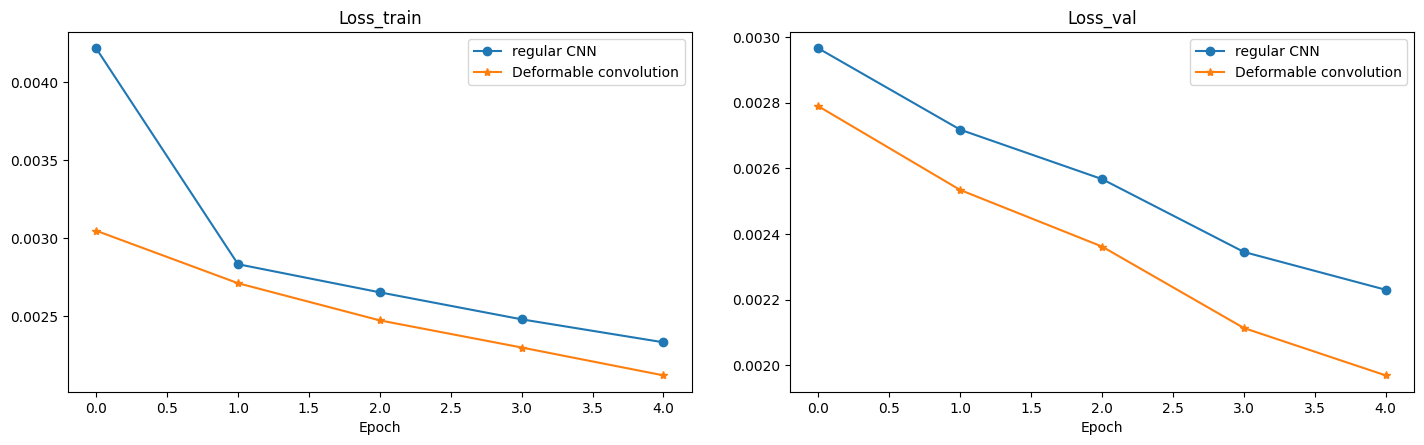

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=4.0)
axes[0].plot(loss_train_conv,marker='o')
axes[0].plot(loss_train_deconv,marker='*')
axes[0].set_title('Loss_train')
axes[0].set_xlabel('Epoch')

axes[0].legend(['regular CNN','Deformable convolution'])

axes[1].plot(loss_val_conv,marker='o')
axes[1].plot(loss_val_deconv,marker='*')

axes[1].set_title('Loss_val')
axes[1].set_xlabel('Epoch')
axes[1].legend(['regular CNN','Deformable convolution'])


as you can deformable convoultion has better perfomance